## Part 1l: fastai Data Augmentation Capabilities

**Description:**

This Colab demonstrates the powerful and convenient data augmentation capabilities provided by the fastai library for computer vision tasks. We will explore how to use fastai's `DataLoaders`, `item_tfms`, `batch_tfms`, `Pipeline`, and the `aug_transforms` function to apply various image augmentations.

> Add blockquote



In [1]:
# Install fastai (if not already installed)
!pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.5 MB/s eta 0:00:00


In [10]:

!pip install -q fastai

In [15]:
from fastai.vision.all import *

path = untar_data(URLs.MNIST_SAMPLE, force_download=True)
print(path.ls())  # top-level folders


[Path('/root/.fastai/data/mnist_sample/labels.csv'), Path('/root/.fastai/data/mnist_sample/train'), Path('/root/.fastai/data/mnist_sample/valid')]


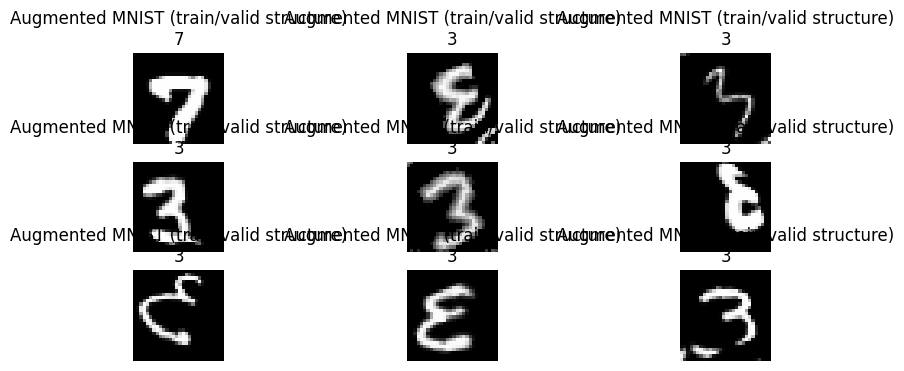

In [16]:
# Imports
from fastai.vision.all import *
import matplotlib.pyplot as plt

# Load MNIST sample dataset
path = untar_data(URLs.MNIST_SAMPLE)

# Load data from train/valid folders
dls = ImageDataLoaders.from_folder(
    path,
    train='train',
    valid='valid',
    bs=64,
    item_tfms=Resize(28),
    batch_tfms=aug_transforms(
        mult=1.5,
        do_flip=True,
        max_rotate=30.0,
        max_lighting=0.4,
        max_warp=0.2,
        p_affine=0.75,
        p_lighting=0.75
    )
)

# Show augmented batch
dls.show_batch(max_n=9, figsize=(10, 4), title="Augmented MNIST (train/valid structure)")


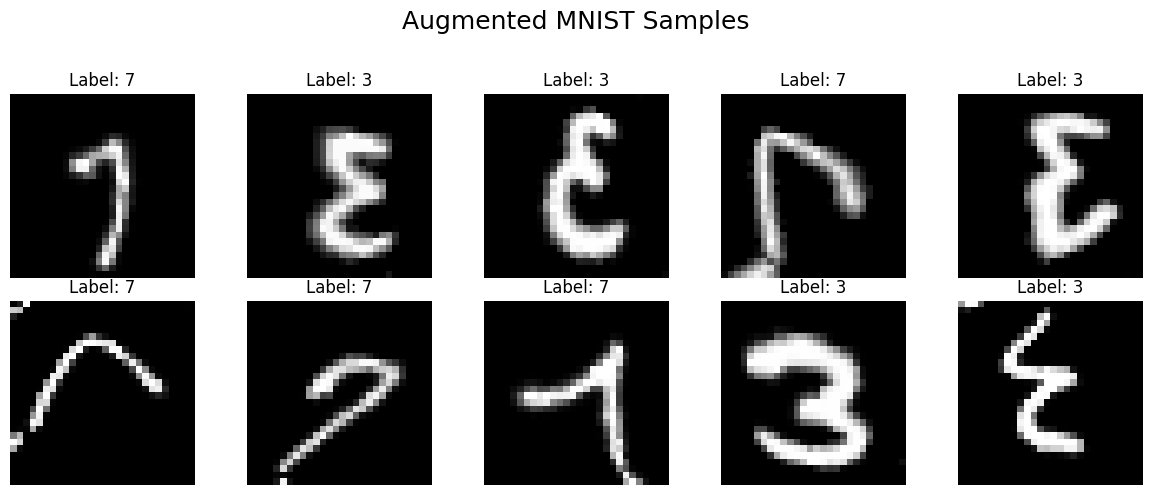

In [18]:
import matplotlib.pyplot as plt

# Get a single batch from the DataLoader
xb, yb = dls.one_batch()

# Define class labels
classes = dls.vocab

# Plot the images nicely
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle("Augmented MNIST Samples", fontsize=18)

for i, ax in enumerate(axes.flat):
    img = xb[i][0]  # single-channel image
    label = classes[yb[i]]
    ax.imshow(img.cpu(), cmap='gray')
    ax.set_title(f"Label: {label}", fontsize=12)
    ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
plt.show()


/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 68.4MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.404108,0.225308,0.915604,01:37


epoch,train_loss,valid_loss,accuracy,time
0,0.154252,0.070382,0.976448,03:05
1,0.082647,0.024548,0.993131,03:02
2,0.059682,0.016974,0.995093,03:04
3,0.049439,0.015380,0.995093,03:04
4,0.041055,0.015193,0.995584,03:03


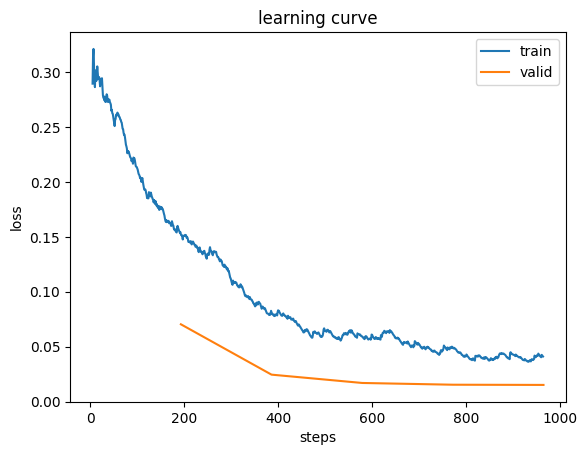

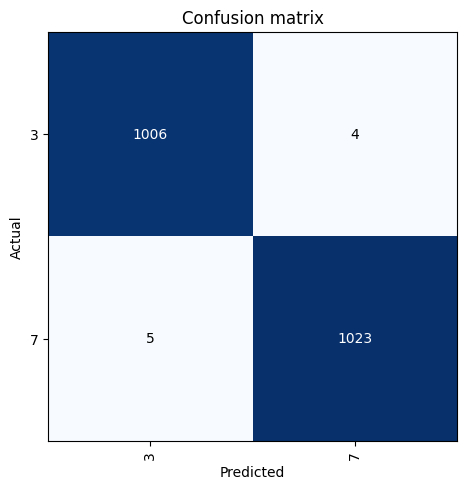

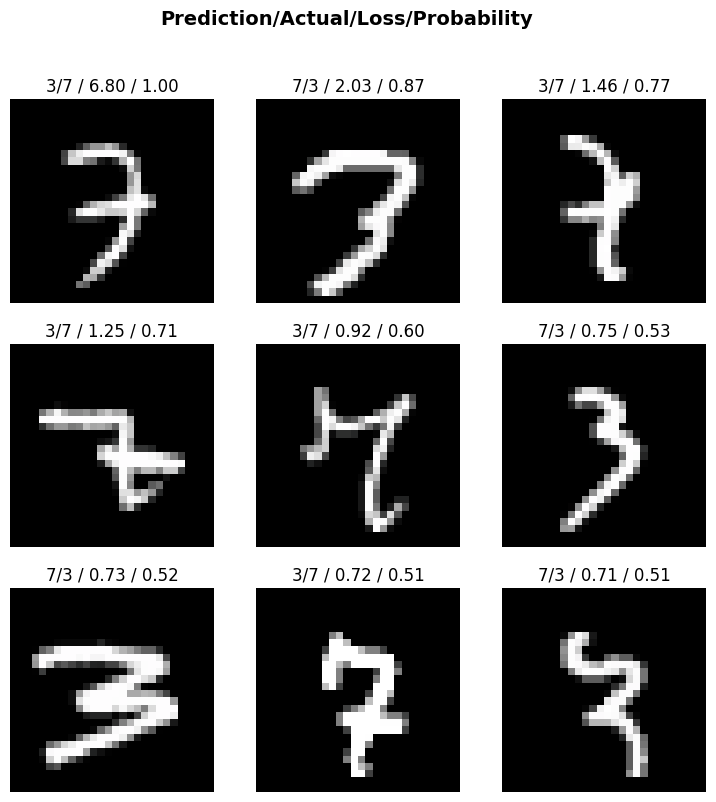

In [17]:
# Create a CNN learner using resnet18
learn = cnn_learner(dls, resnet18, metrics=accuracy)

# Train for 5 epochs
learn.fine_tune(5)

# Plot training/validation loss
learn.recorder.plot_loss()

# Interpret predictions
interp = ClassificationInterpretation.from_learner(learn)

# Show confusion matrix
interp.plot_confusion_matrix()

# Show top losses (i.e., misclassified images)
interp.plot_top_losses(9, nrows=3)
